<a href="https://colab.research.google.com/github/kikiru328/enterprise_analysis/blob/main/%EC%A7%84%ED%96%89%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

1. 
    - train.csv : 학습 데이터
    - id : 샘플 아이디
    - Species: 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이
    - Sex : 펭귄의 성별
    - Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
    - Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
    - Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


2. 
    - test.csv : 테스트 데이터
    - id : 샘플 아이디
    - Species: 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이
    - Sex : 펭귄의 성별
    - Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
    - Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율


3. sample_submissoin.csv : 제출 양식
id : 샘플 아이디
Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)




데이터 상세 설명
성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다.
남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율. 
데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.
출처: https://allisonhorst.github.io/palmerpenguins/


###### module import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### EDA

#### Data

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Penguins_bodymass/data/train.csv')
train

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [6]:
df = train.copy()

###### Columns change

In [ ]:
df = df.rename(columns = {
    'id' : 'id',
    'Species': 'species',
    'Island' : 'island',
    'Clutch Completion' : 'eggs_2',
    'Culmen Length (mm)' : 'cul_length',
    'Culmen Depth (mm)' : 'cul_depth',
    'Flipper Length (mm)' : 'flip_length',
    'Sex' : 'sex',
    'Delta 15 N (o/oo)' : 'd15n',
    'Delta 13 C (o/oo)' : 'd13c',
    'Body Mass (g)': 'target'
})

In [ ]:
def data_info(df,null_count_standard): # 0 넣어줘야 전체 뽑힘
    display(df.head(2))
    print('[shape] : ',df.shape)
    print('[rows] : {} , [columns] : {}'.format(df.shape[0],df.shape[1]),'\n')
    print('[value_counts] : ',df.dtypes.value_counts(),'\n')
    print('[columns] : ' ,df.columns,'\n')
    nl_v = df.isnull().sum()
    print('[Null_values] : ','\n',nl_v[nl_v>null_count_standard].sort_values(ascending=False))
    print('[Null_columns] : ','\n', list(nl_v[nl_v>null_count_standard].keys()))

In [ ]:
data_info(df,0)

,id,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800


[shape] :  (114, 11)
[rows] : 114 , [columns] : 11 

[value_counts] :  object     4
float64    4
int64      3
dtype: int64 

[columns] :  Index(['id', 'species', 'island', 'eggs_2', 'cul_length', 'cul_depth',
       'flip_length', 'sex', 'd15n', 'd13c', 'target'],
      dtype='object') 

[Null_values] :  
 d13c    3
d15n    3
sex     3
dtype: int64
[Null_columns] :  
 ['sex', 'd15n', 'd13c']


In [ ]:
df[df.isnull().any(axis=1)]

,id,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [ ]:
df.loc[(df.sex.isnull())&(df['target'] > 4250),'sex'] = 0
df.loc[(df.sex.isnull())&(df['target'] <= 4250),'sex'] = 1
df.loc[(df.sex.isnull())&(df['flip_length'] > 205),'sex'] = 0
df.loc[(df.sex.isnull())&(df['flip_length'] <= 205),'sex'] = 1

In [ ]:
df.isnull().sum()

id             0
species        0
island         0
eggs_2         0
cul_length     0
cul_depth      0
flip_length    0
sex            0
d15n           3
d13c           3
target         0
dtype: int64

In [ ]:
le = LabelEncoder()
features = ['species','island','eggs_2']
for feature in features:
    df[feature] = le.fit_transform(df[feature])
    display(df[feature].head(3))
    display(le.inverse_transform(df[feature].head(3)))

0    2
1    1
2    2
Name: species, dtype: int64

array(['Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

0    0
1    1
2    0
Name: island, dtype: int64

array(['Biscoe', 'Dream', 'Biscoe'], dtype=object)

0    1
1    0
2    1
Name: eggs_2, dtype: int64

array(['Yes', 'No', 'Yes'], dtype=object)

In [ ]:
# display(train[train['Species']=='Gentoo penguin (Pygoscelis papua)'].iloc[[0]]) 
# display(df[df['id']==0].iloc[[0]])

In [ ]:
display(train.iloc[[0]])
display(df.iloc[[0]])

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550


,id,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
0,0,2,0,1,50.0,15.3,220,0,8.30515,-25.19017,5550


###### Null

In [ ]:
display(df[df['d15n'].isnull()==True])
display(df[df['d13c'].isnull()==True])

,id,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
8,8,0,2,1,34.1,18.1,193,0,NaN,NaN,3475
18,18,0,1,0,39.8,19.1,184,0,NaN,NaN,4650
109,109,0,2,1,36.6,17.8,185,1,NaN,NaN,3700


,id,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
8,8,0,2,1,34.1,18.1,193,0,NaN,NaN,3475
18,18,0,1,0,39.8,19.1,184,0,NaN,NaN,4650
109,109,0,2,1,36.6,17.8,185,1,NaN,NaN,3700


##### Visualization

###### pair

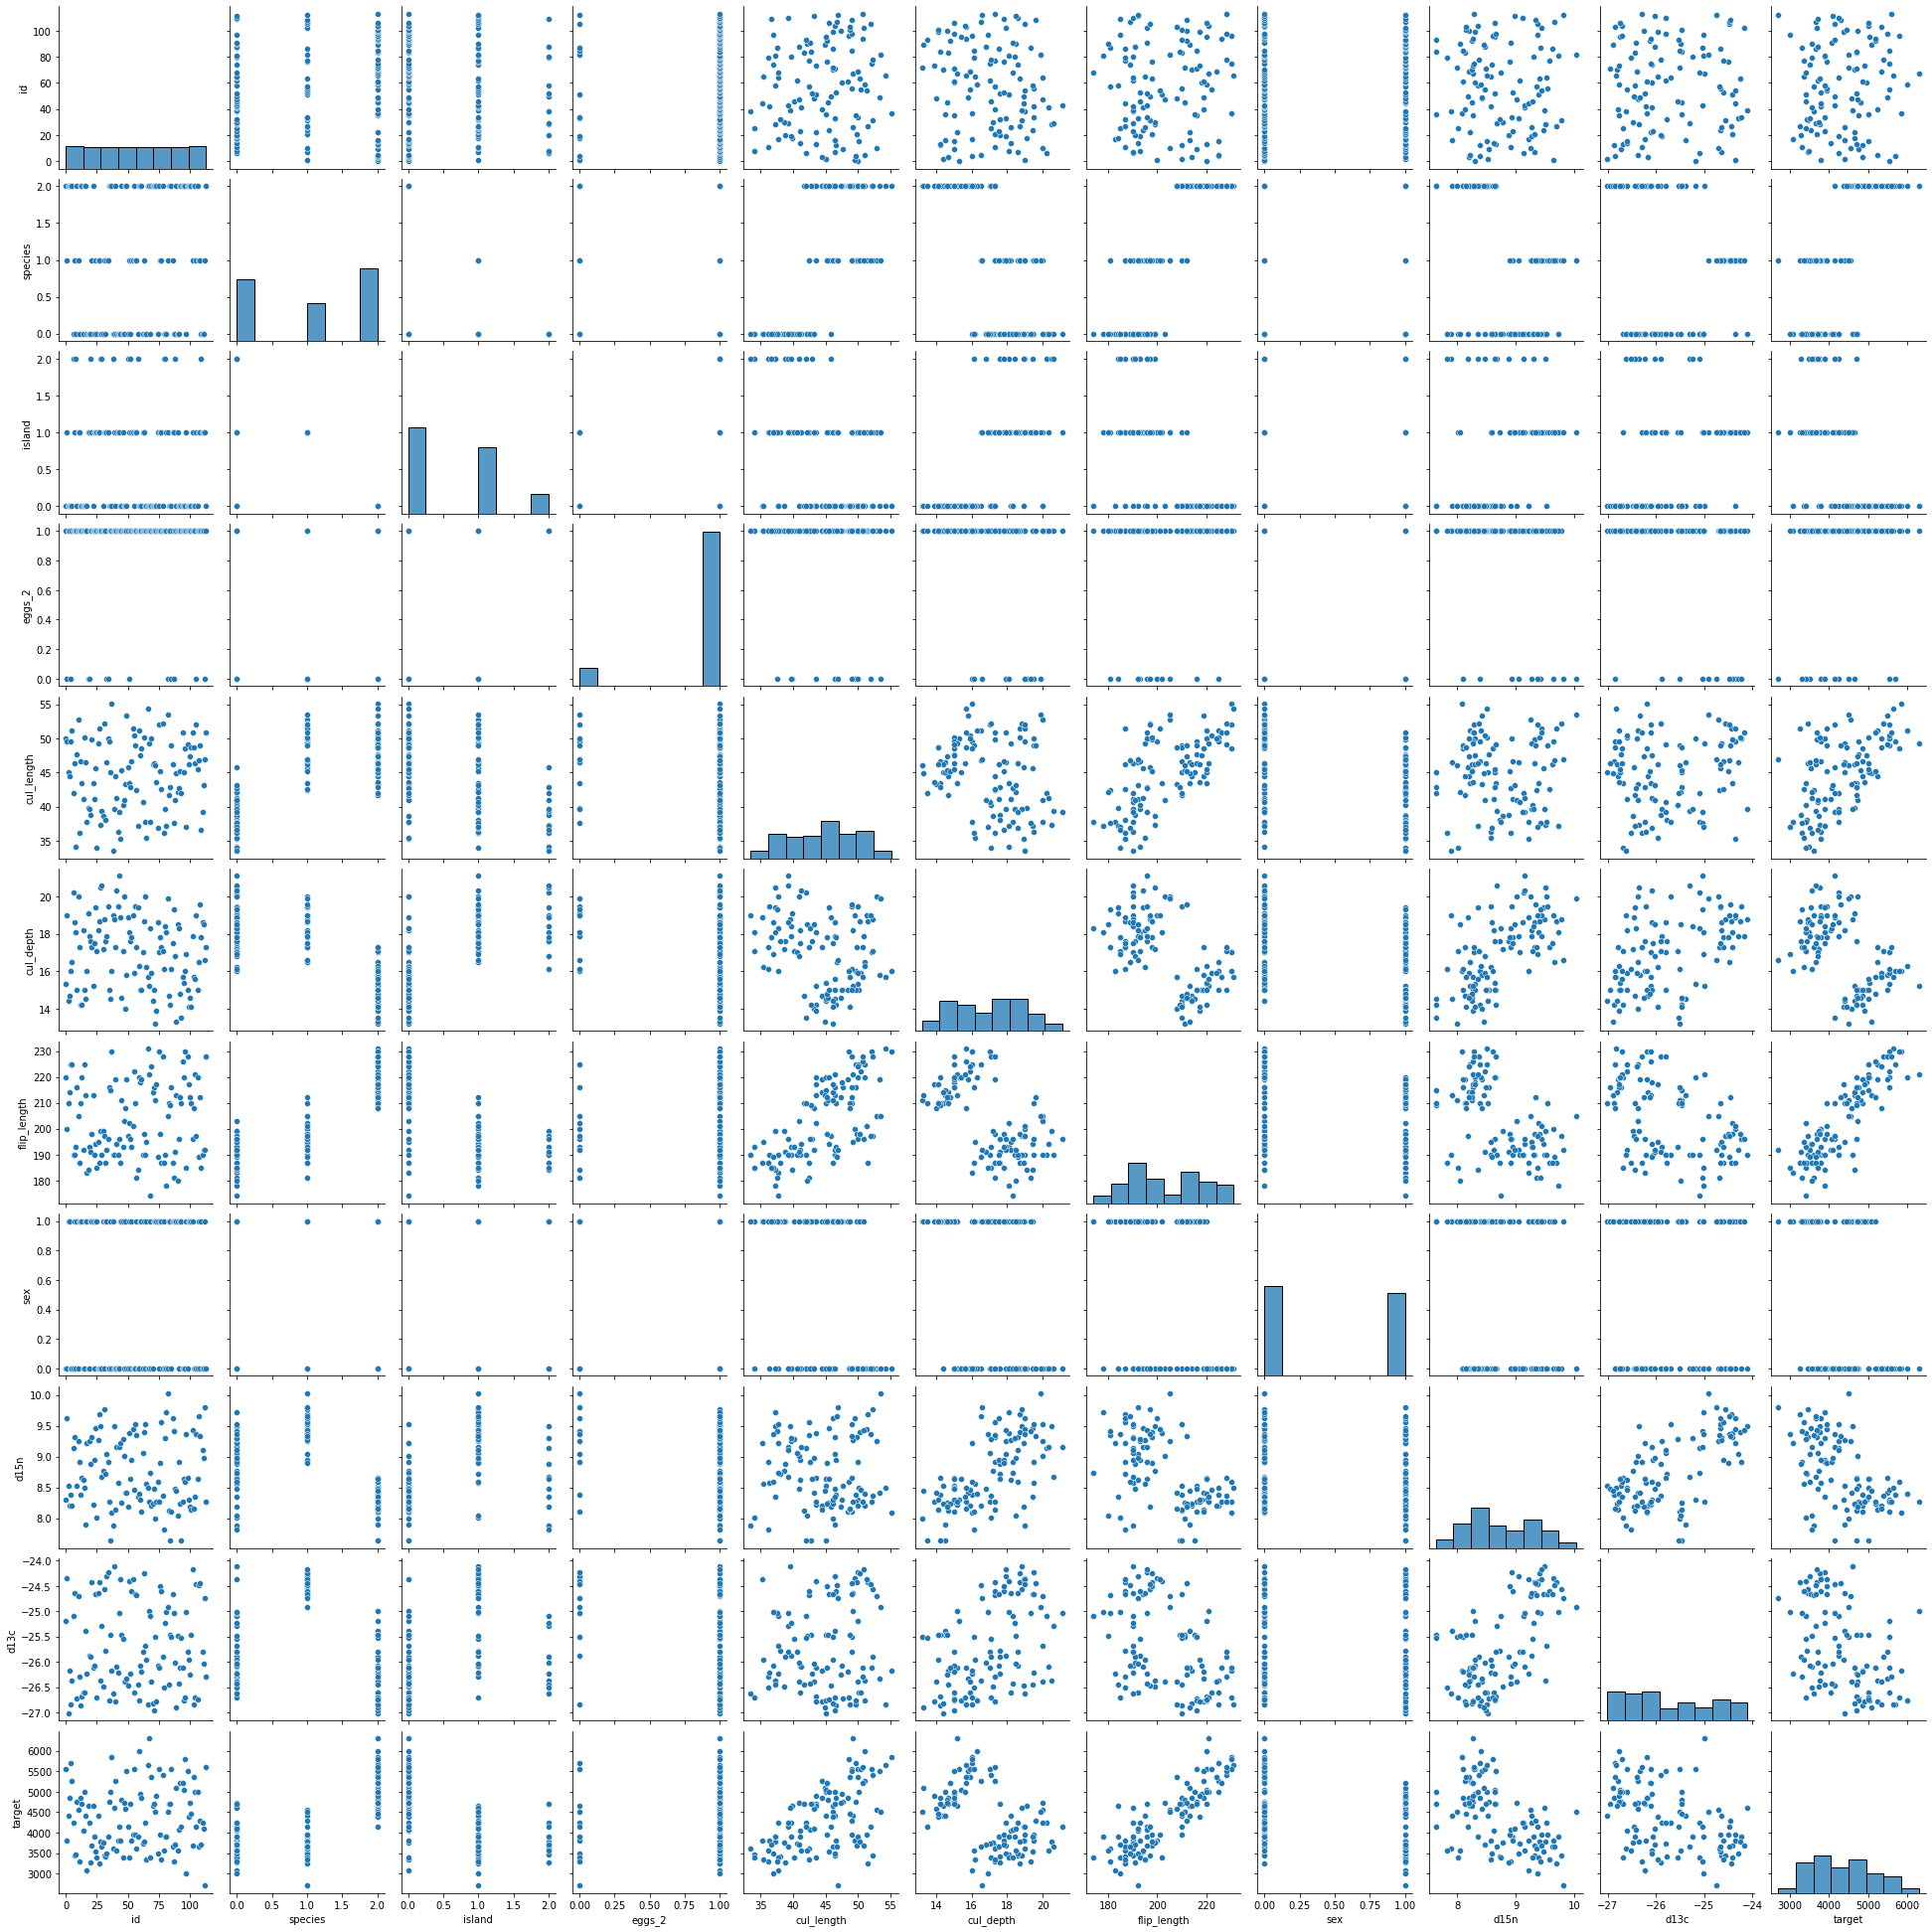

In [ ]:
sns.pairplot(df)

###### d15n - d13c

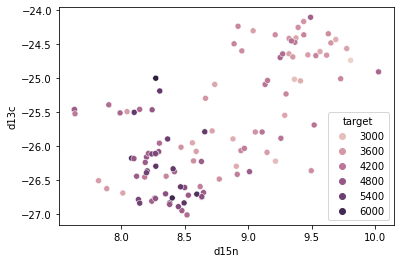

In [ ]:
sns.scatterplot(data=df, x ='d15n',y='d13c',hue='target')

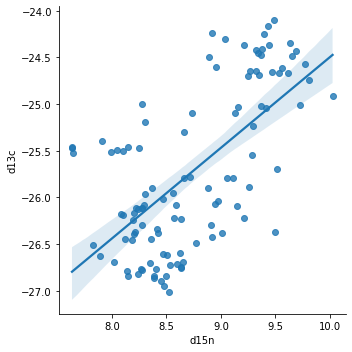

In [ ]:
sns.lmplot(data=df,x='d15n',y='d13c')

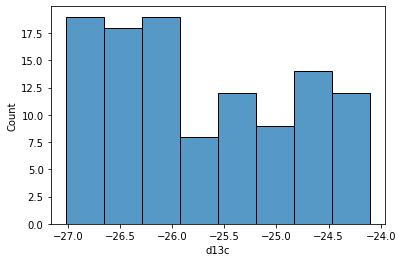

In [ ]:
sns.histplot(df['d13c'])

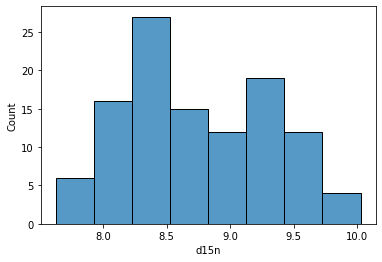

In [ ]:
sns.histplot(df['d15n'])

###### Fill nan

In [ ]:
df['d15n'] = df['d15n'].fillna(np.mean(df['d15n']))
df['d13c'] = df['d13c'].fillna(np.mean(df['d13c']))

In [ ]:
df.isnull().sum()

id             0
species        0
island         0
eggs_2         0
cul_length     0
cul_depth      0
flip_length    0
sex            0
d15n           0
d13c           0
target         0
dtype: int64

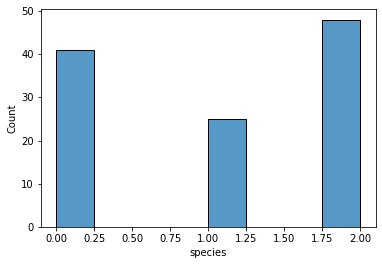

In [ ]:
sns.histplot(df['species'])

###### island

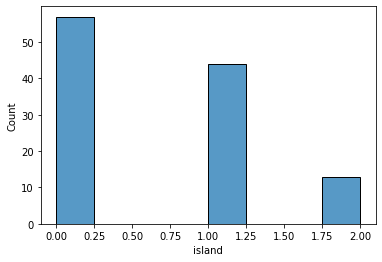

In [ ]:
sns.histplot(df['island'])

###### culmen

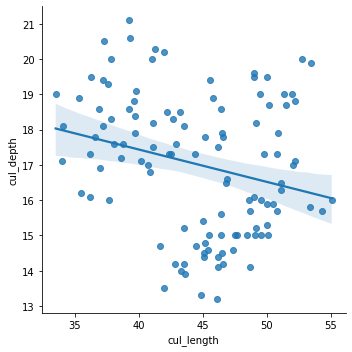

In [ ]:
sns.lmplot(data=df,x='cul_length',y='cul_depth')

###### sex

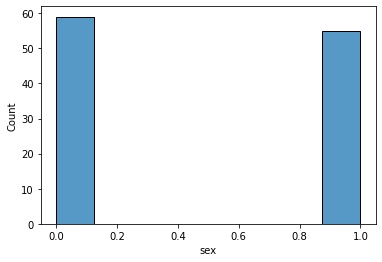

In [ ]:
sns.histplot(data=df['sex'])

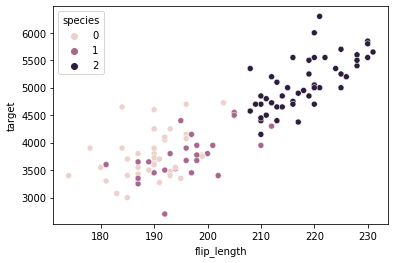

In [ ]:
sns.scatterplot(data=df, x='flip_length',y='target',hue='species')

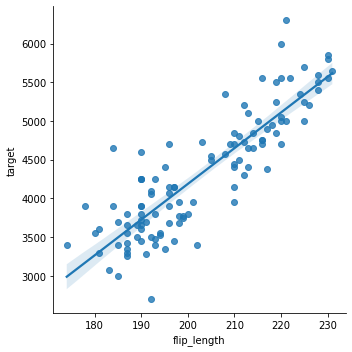

In [ ]:
sns.lmplot(data=df, x='flip_length', y ='target')

##### Corr

In [ ]:
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    plt.figure(figsize=(10,10))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    print(cr_v)
    print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond).keys())


AxesSubplot(0.125,0.125;0.62x0.755)
species    cul_depth     -0.747121
cul_depth  species       -0.747121
island     species       -0.719412
species    island        -0.719412
island     flip_length   -0.680380
                            ...   
eggs_2     eggs_2         1.000000
island     island         1.000000
species    species        1.000000
d13c       d13c           1.000000
target     target         1.000000
Length: 121, dtype: float64

 species    cul_depth     -0.747121
cul_depth  species       -0.747121
island     species       -0.719412
species    island        -0.719412
island     flip_length   -0.680380
                            ...   
eggs_2     eggs_2         1.000000
island     island         1.000000
species    species        1.000000
d13c       d13c           1.000000
target     target         1.000000
Length: 121, dtype: float64 

dict_keys(['species', 'cul_depth', 'island', 'flip_length', 'target', 'd15n', 'd13c', 'sex', 'cul_length', 'eggs_2', 'id'])


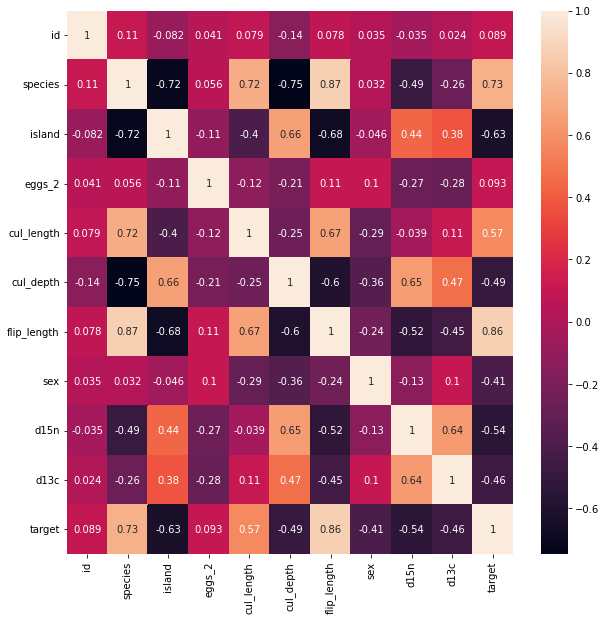

In [ ]:
# a = df.drop('target',axis=1)
get_corr(df,0,1)

##### Drop columns

In [ ]:
train_df = df.copy()
train_df = train_df.drop('id',axis=1)

##### Standard scaler

In [ ]:
# std = StandardScaler()
# std_columns = ['cul_length','cul_depth','filp_length','d15n','d13c']
# before_df = train_df.drop(['species','island','eggs_2','sex','target'],axis=1)
# target = train_df['target']

# before_data = std.fit_transform(before_df)
# after_df = pd.DataFrame(data=before_data, columns=std_columns)

# final_df = pd.concat( [after_df, train_df[['species','island','eggs_2','sex','target']] ], axis=1 )

In [ ]:
final_df = train_df.copy()
final_df

,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
0,2,0,1,50.0,15.3,220,0,8.305150,-25.190170,5550
1,1,1,0,49.5,19.0,200,0,9.630740,-24.346840,3800
2,2,0,1,45.1,14.4,210,1,8.519510,-27.018540,4400
3,2,0,1,44.5,14.7,214,1,8.201060,-26.165240,4850
4,2,0,0,49.6,16.0,225,0,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,0,2,1,36.6,17.8,185,1,8.737634,-25.723051,3700
110,0,1,1,39.2,18.6,190,0,9.110060,-25.795490,4250
111,0,1,1,43.2,18.5,192,0,8.970250,-26.036790,4100
112,1,1,0,46.9,16.6,192,1,9.805890,-24.737350,2700


##### label_Decoder

In [ ]:
train['Species'].unique() # 0 : Adelie / 1 : Chinstrap / 2 : Gentoo
train['Island'].unique() # 0 : Biscoe / 1 : Dream / 2 : Torgersen

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [ ]:
def decoding_species(x):
    species = ''
    if x == 0 : species = 'Adelie Penguin (Pygoscelis adeliae)'
    elif x == 1 : species = 'Chinstrap penguin (Pygoscelis antarctica)'
    else : species = 'Gentoo penguin (Pygoscelis papua)'
    return species

def decoding_island(x):
    island = ''
    if x == 0 : island = 'Biscoe'
    elif x == 1 : island = 'Dream'
    else : island = 'Torgersen'
    return island

In [ ]:
final_df['species'] = final_df['species'].apply(lambda x : decoding_species(x))
final_df['island'] = final_df['island'].apply(lambda x : decoding_island(x))

###### Label to onehot

In [ ]:
final_df

,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target
0,Gentoo penguin (Pygoscelis papua),Biscoe,1,50.0,15.3,220,0,8.305150,-25.190170,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,0,49.5,19.0,200,0,9.630740,-24.346840,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,1,45.1,14.4,210,1,8.519510,-27.018540,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,1,44.5,14.7,214,1,8.201060,-26.165240,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,0,49.6,16.0,225,0,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,1,36.6,17.8,185,1,8.737634,-25.723051,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,1,39.2,18.6,190,0,9.110060,-25.795490,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,1,43.2,18.5,192,0,8.970250,-26.036790,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,0,46.9,16.6,192,1,9.805890,-24.737350,2700


In [ ]:
oh_species = pd.get_dummies(final_df['species'])
oh_island = pd.get_dummies(final_df['island'])
Final = pd.concat([final_df,oh_species,oh_island],axis=1)
Final.head()

,species,island,eggs_2,cul_length,cul_depth,flip_length,sex,d15n,d13c,target,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen
0,Gentoo penguin (Pygoscelis papua),Biscoe,1,50.0,15.3,220,0,8.30515,-25.19017,5550,0,0,1,1,0,0
1,Chinstrap penguin (Pygoscelis antarctica),Dream,0,49.5,19.0,200,0,9.63074,-24.34684,3800,0,1,0,0,1,0
2,Gentoo penguin (Pygoscelis papua),Biscoe,1,45.1,14.4,210,1,8.51951,-27.01854,4400,0,0,1,1,0,0
3,Gentoo penguin (Pygoscelis papua),Biscoe,1,44.5,14.7,214,1,8.20106,-26.16524,4850,0,0,1,1,0,0
4,Gentoo penguin (Pygoscelis papua),Biscoe,0,49.6,16.0,225,0,8.38324,-26.84272,5700,0,0,1,1,0,0


AxesSubplot(0.125,0.125;0.62x0.755)
flip_length  cul_depth     -0.603341
cul_depth    flip_length   -0.603341
d15n         target        -0.543740
target       d15n          -0.543740
d15n         flip_length   -0.524236
                              ...   
flip_length  flip_length    1.000000
cul_depth    cul_depth      1.000000
cul_length   cul_length     1.000000
d13c         d13c           1.000000
target       target         1.000000
Length: 64, dtype: float64

 flip_length  cul_depth     -0.603341
cul_depth    flip_length   -0.603341
d15n         target        -0.543740
target       d15n          -0.543740
d15n         flip_length   -0.524236
                              ...   
flip_length  flip_length    1.000000
cul_depth    cul_depth      1.000000
cul_length   cul_length     1.000000
d13c         d13c           1.000000
target       target         1.000000
Length: 64, dtype: float64 

dict_keys(['flip_length', 'cul_depth', 'd15n', 'target', 'd13c', 'sex', 'cul_length', 'eggs_

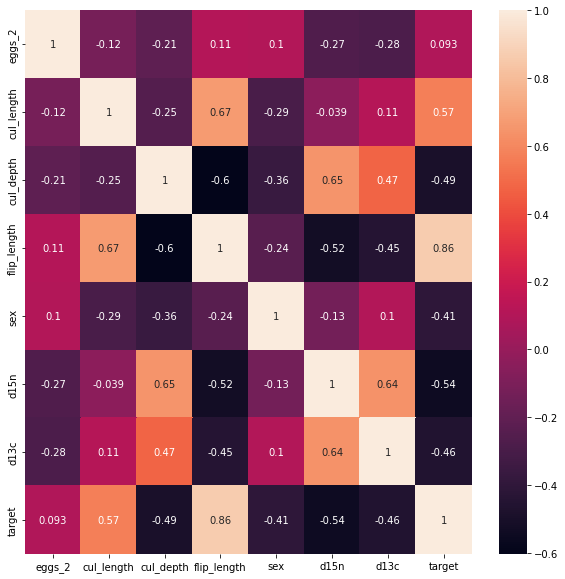

In [ ]:
get_corr(final_df,0,1)

### df_selection

#### Test1
- no eggs

In [ ]:
test1 = Final.drop(['eggs_2','species','island'],axis=1)
x = test1.drop('target',axis=1)
y = test1['target']

test1.corr()

,cul_length,cul_depth,flip_length,sex,d15n,d13c,target,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen
cul_length,1.000000,-0.251255,0.672205,-0.294620,-0.038911,0.111280,0.572063,-0.820508,0.377195,0.481414,0.296513,-0.047199,-0.394139
cul_depth,-0.251255,1.000000,-0.603341,-0.364386,0.645813,0.474151,-0.490643,0.522864,0.378706,-0.825594,-0.724780,0.559757,0.282796
flip_length,0.672205,-0.603341,1.000000,-0.238123,-0.524236,-0.446668,0.864814,-0.688047,-0.253306,0.881057,0.739562,-0.566061,-0.296392
sex,-0.294620,-0.364386,-0.238123,1.000000,-0.130947,0.101047,-0.405566,-0.065138,0.082247,-0.005614,0.017555,0.027836,-0.070247
d15n,-0.038911,0.645813,-0.524236,-0.130947,1.000000,0.641107,-0.543740,0.168573,0.645978,-0.705216,-0.635678,0.694254,-0.063361
d13c,0.111280,0.474151,-0.446668,0.101047,0.641107,1.000000,-0.464210,-0.085447,0.757622,-0.551876,-0.580502,0.665330,-0.105855
target,0.572063,-0.490643,0.864814,-0.405566,-0.543740,-0.464210,1.000000,-0.507076,-0.389398,0.819209,0.708050,-0.573564,-0.235331
Adelie Penguin (Pygoscelis adeliae),-0.820508,0.522864,-0.688047,-0.065138,0.168573,-0.085447,-0.507076,1.000000,-0.397197,-0.639115,-0.420411,0.119228,0.478719
Chinstrap penguin (Pygoscelis antarctica),0.377195,0.378706,-0.253306,0.082247,0.645978,0.757622,-0.389398,-0.397197,1.000000,-0.451985,-0.529999,0.668494,-0.190145
Gentoo penguin (Pygoscelis papua),0.481414,-0.825594,0.881057,-0.005614,-0.705216,-0.551876,0.819209,-0.639115,-0.451985,1.000000,0.852803,-0.676123,-0.305956


In [ ]:
test1

,cul_length,cul_depth,flip_length,sex,d15n,d13c,target,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen
0,50.0,15.3,220,0,8.305150,-25.190170,5550,0,0,1,1,0,0
1,49.5,19.0,200,0,9.630740,-24.346840,3800,0,1,0,0,1,0
2,45.1,14.4,210,1,8.519510,-27.018540,4400,0,0,1,1,0,0
3,44.5,14.7,214,1,8.201060,-26.165240,4850,0,0,1,1,0,0
4,49.6,16.0,225,0,8.383240,-26.842720,5700,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185,1,8.737634,-25.723051,3700,1,0,0,0,0,1
110,39.2,18.6,190,0,9.110060,-25.795490,4250,1,0,0,0,1,0
111,43.2,18.5,192,0,8.970250,-26.036790,4100,1,0,0,0,1,0
112,46.9,16.6,192,1,9.805890,-24.737350,2700,0,1,0,0,1,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
def linear_evaluation(model_name,y_test,prediction):
    from sklearn.metrics import mean_squared_error, r2_score
    name = model_name
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,prediction)
    print('[Model]:', model_name,'\n')
    print('[MSE]: {:.4f}'.format(mse))
    print('[RMSE]: {:.4f}'.format(rmse))
    print('[r2]: {:.4f}'.format(r2),'\n')
    print('[Intercept]:' , name.intercept_,'\n')
    print('[corr_effeicient]:', name.coef_,2)
    print('[corr_effeicient_round]:', np.round(name.coef_,2))
    print('---' * 30)
    display('[histplot]',y.plot(kind='hist'))

In [ ]:
def get_linear_eval(model_name, params=None, X_data_n=None, y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#####' ,model_name , '#####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mean_scores = cross_val_score(model,X_data_n,y_target_n, scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mean_scores))
        
        print('alpha : {}  (5 folds) RMSE means : {:.4f}'.format(param,avg_rmse))
        model.fit(X_data_n, y_target_n)
        
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname= 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
Ls = Lasso(10)
Rd = Ridge(10)
En = ElasticNet(10)

r_models = [Ls,Rd,En]

for r_m in r_models:
    r_m.fit(X_train,y_train)



In [ ]:
Ls_pred = Ls.predict(X_test)
Rd_pred = Rd.predict(X_test)
En_pred = En.predict(X_test)

[Model]: Lasso(alpha=10) 

[MSE]: 156333.1887
[RMSE]: 395.3899
[r2]: 0.7436 

[Intercept]: -6843.129102073566 

[corr_effeicient]: [  29.08202152    4.98286544   36.68193554 -123.42014052  194.03343368
  -29.99509896    0.         -341.32031652    0.          126.23037266
   -0.           -0.        ] 2
[corr_effeicient_round]: [  29.08    4.98   36.68 -123.42  194.03  -30.      0.   -341.32    0.
  126.23   -0.     -0.  ]
------------------------------------------------------------------------------------------


'[histplot]'

[Model]: Ridge(alpha=10) 

[MSE]: 159597.6690
[RMSE]: 399.4968
[r2]: 0.7383 

[Intercept]: -6930.94995005678 

[corr_effeicient]: [ 19.36263541  25.05899262  38.74460006 -75.39519344  56.92419557
 -65.01993252  37.39241483 -75.79321379  38.40079896  64.83037837
 -30.25352649 -34.57685188] 2
[corr_effeicient_round]: [ 19.36  25.06  38.74 -75.4   56.92 -65.02  37.39 -75.79  38.4   64.83
 -30.25 -34.58]
------------------------------------------------------------------------------------------


'[histplot]'

[Model]: ElasticNet(alpha=10) 

[MSE]: 180631.1252
[RMSE]: 425.0072
[r2]: 0.7038 

[Intercept]: -5163.1929693462735 

[corr_effeicient]: [ 9.2757411   8.22406798 42.98285186 -9.46230847  3.32836061 -9.73763647
  3.20460593 -6.19808595  1.99347551  5.45034193 -3.0102702  -1.44008428] 2
[corr_effeicient_round]: [ 9.28  8.22 42.98 -9.46  3.33 -9.74  3.2  -6.2   1.99  5.45 -3.01 -1.44]
------------------------------------------------------------------------------------------


'[histplot]'

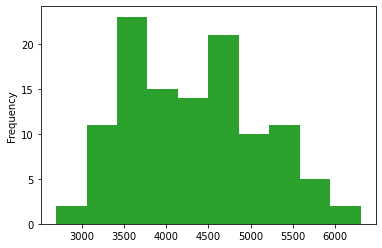

In [ ]:
r_predictions = [Ls_pred, Rd_pred,En_pred]

for model, pred in zip(r_models, r_predictions):
    linear_evaluation(model,y_test,pred)

# 다시

In [58]:
df

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.305150,-25.190170,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.630740,-24.346840,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.519510,-27.018540,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.201060,-26.165240,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,8.737634,-25.723051,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.110060,-25.795490,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.970250,-26.036790,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.805890,-24.737350,2700


In [59]:
df['Delta 13 C (o/oo)'] = df['Delta 13 C (o/oo)'].fillna( np.mean(df['Delta 13 C (o/oo)']))
df['Delta 15 N (o/oo)'] = df['Delta 15 N (o/oo)'].fillna( np.mean(df['Delta 15 N (o/oo)']))

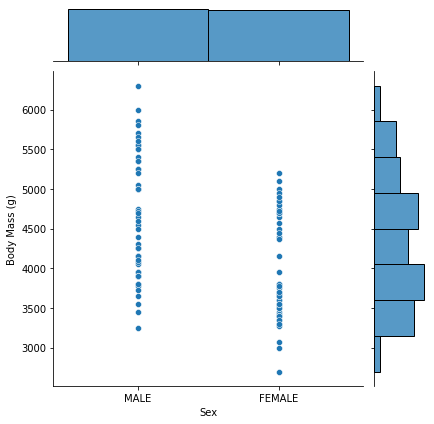

In [60]:
sns.jointplot(data=df, x='Sex', y='Body Mass (g)')

In [61]:
df[df.isnull().any(axis=1)]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.133620,-25.093680,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,8.737634,-25.723051,3475
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.242530,-26.815400,4650


## 성별찾기

In [62]:
# 성별찾기
df_ = df.drop('id',axis=1)

In [63]:
a = pd.get_dummies(df_['Species'])

In [64]:
b = pd.get_dummies(df_['Island'])

In [65]:
le = LabelEncoder()
df_['Clutch Completion'] = le.fit_transform(df_['Clutch Completion'])
df_['Sex'] = le.fit_transform(df_['Sex'])

In [66]:
c = pd.concat([df_,a,b],axis=1)

In [67]:
c

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen
0,Gentoo penguin (Pygoscelis papua),Biscoe,1,50.0,15.3,220,1,8.305150,-25.190170,5550,0,0,1,1,0,0
1,Chinstrap penguin (Pygoscelis antarctica),Dream,0,49.5,19.0,200,1,9.630740,-24.346840,3800,0,1,0,0,1,0
2,Gentoo penguin (Pygoscelis papua),Biscoe,1,45.1,14.4,210,0,8.519510,-27.018540,4400,0,0,1,1,0,0
3,Gentoo penguin (Pygoscelis papua),Biscoe,1,44.5,14.7,214,0,8.201060,-26.165240,4850,0,0,1,1,0,0
4,Gentoo penguin (Pygoscelis papua),Biscoe,0,49.6,16.0,225,1,8.383240,-26.842720,5700,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,1,36.6,17.8,185,0,8.737634,-25.723051,3700,1,0,0,0,0,1
110,Adelie Penguin (Pygoscelis adeliae),Dream,1,39.2,18.6,190,1,9.110060,-25.795490,4250,1,0,0,0,1,0
111,Adelie Penguin (Pygoscelis adeliae),Dream,1,43.2,18.5,192,1,8.970250,-26.036790,4100,1,0,0,0,1,0
112,Chinstrap penguin (Pygoscelis antarctica),Dream,0,46.9,16.6,192,0,9.805890,-24.737350,2700,0,1,0,0,1,0


In [68]:
CC = c.drop(['Species','Island'],axis=1)
CC

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen
0,1,50.0,15.3,220,1,8.305150,-25.190170,5550,0,0,1,1,0,0
1,0,49.5,19.0,200,1,9.630740,-24.346840,3800,0,1,0,0,1,0
2,1,45.1,14.4,210,0,8.519510,-27.018540,4400,0,0,1,1,0,0
3,1,44.5,14.7,214,0,8.201060,-26.165240,4850,0,0,1,1,0,0
4,0,49.6,16.0,225,1,8.383240,-26.842720,5700,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,36.6,17.8,185,0,8.737634,-25.723051,3700,1,0,0,0,0,1
110,1,39.2,18.6,190,1,9.110060,-25.795490,4250,1,0,0,0,1,0
111,1,43.2,18.5,192,1,8.970250,-26.036790,4100,1,0,0,0,1,0
112,0,46.9,16.6,192,0,9.805890,-24.737350,2700,0,1,0,0,1,0


In [69]:
Need = CC.drop([6,8,70],axis=0)
Need

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen
0,1,50.0,15.3,220,1,8.305150,-25.190170,5550,0,0,1,1,0,0
1,0,49.5,19.0,200,1,9.630740,-24.346840,3800,0,1,0,0,1,0
2,1,45.1,14.4,210,0,8.519510,-27.018540,4400,0,0,1,1,0,0
3,1,44.5,14.7,214,0,8.201060,-26.165240,4850,0,0,1,1,0,0
4,0,49.6,16.0,225,1,8.383240,-26.842720,5700,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,36.6,17.8,185,0,8.737634,-25.723051,3700,1,0,0,0,0,1
110,1,39.2,18.6,190,1,9.110060,-25.795490,4250,1,0,0,0,1,0
111,1,43.2,18.5,192,1,8.970250,-26.036790,4100,1,0,0,0,1,0
112,0,46.9,16.6,192,0,9.805890,-24.737350,2700,0,1,0,0,1,0


In [70]:
X = Need.drop('Sex',axis=1)
y = Need.Sex

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test,pred)

In [73]:
acc

0.8205128205128205

In [74]:
f1

0.825

In [75]:
Find = CC.iloc[[6,8,70]]

In [76]:
Find = Find.drop('Sex',axis=1)

pred_find = rfc.predict(Find)

In [77]:
pred_find = pd.DataFrame(pred_find)

In [78]:
pred_find = pred_find.rename(columns = {0:'Sex'})

In [79]:
Answer = pd.concat([Find,pred_find],axis=1)
Answer

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Biscoe,Dream,Torgersen,Sex
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,1.0,42.0,20.2,190.0,9.133620,-25.093680,4250.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
8,1.0,34.1,18.1,193.0,8.737634,-25.723051,3475.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
70,1.0,46.2,14.4,214.0,8.242530,-26.815400,4650.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN


In [80]:
CC = df_.drop(['Species','Island'],axis=1)

In [83]:
CC.loc[6,'Sex']=1
CC.loc[8,'Sex']=0
CC.loc[70,'Sex']=0

In [84]:
CC.loc[8,'Sex']

0

In [85]:
CC

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,1,50.0,15.3,220,1,8.305150,-25.190170,5550
1,0,49.5,19.0,200,1,9.630740,-24.346840,3800
2,1,45.1,14.4,210,0,8.519510,-27.018540,4400
3,1,44.5,14.7,214,0,8.201060,-26.165240,4850
4,0,49.6,16.0,225,1,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...
109,1,36.6,17.8,185,0,8.737634,-25.723051,3700
110,1,39.2,18.6,190,1,9.110060,-25.795490,4250
111,1,43.2,18.5,192,1,8.970250,-26.036790,4100
112,0,46.9,16.6,192,0,9.805890,-24.737350,2700


In [86]:
X = CC.drop('Body Mass (g)',axis=1)
y = CC['Body Mass (g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_prediction = rfr.predict(X_test)

lg.fit(X_train, y_train)
lg_prediction = lg.predict(X_test)

In [87]:
def linear_evaluation(model_name,y_test,prediction):
    from sklearn.metrics import mean_squared_error, r2_score
    name = model_name
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,prediction)
    print('[Model]:', model_name,'\n')
    print('[RMSE]: {:.4f}'.format(rmse))

In [88]:
linear_evaluation(lg,y_test,lg_prediction)

[Model]: LogisticRegression() 

[RMSE]: 506.4935


In [89]:
linear_evaluation(rfr,y_test,rfr_prediction)

[Model]: RandomForestRegressor() 

[RMSE]: 343.7659


TEST2

In [90]:
CC.columns

Index(['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Body Mass (g)'],
      dtype='object')

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Flipper Length (mm)', 'Delta 15 N (o/oo)','Culmen Depth (mm)','Culmen Length (mm)', 'Delta 13 C (o/oo)']
for feature in features:
    CC[feature] = scaler.fit_transform(CC[[feature]])

In [92]:
CC

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,1,1.016685,-0.887255,1.161653,1,-7.755480e-01,6.309514e-01,5550
1,0,0.922318,1.027037,-0.209242,1,1.601553e+00,1.629486e+00,3800
2,1,0.091884,-1.352893,0.476205,0,-3.911490e-01,-1.533908e+00,4400
3,1,-0.021357,-1.197680,0.750384,0,-9.622064e-01,-5.235685e-01,4850
4,0,0.941191,-0.525091,1.504376,1,-6.355139e-01,-1.325731e+00,5700
...,...,...,...,...,...,...,...,...
109,1,-1.512363,0.406186,-1.237413,0,-6.370870e-15,1.261964e-14,3700
110,1,-1.021652,0.820087,-0.894689,1,6.678491e-01,-8.577043e-02,4250
111,1,-0.266712,0.768349,-0.757600,1,4.171361e-01,-3.714788e-01,4100
112,0,0.431607,-0.214666,-0.757600,0,1.915640e+00,1.167108e+00,2700


In [93]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

X = CC.drop(['Body Mass (g)'],axis=1)
y = CC['Body Mass (g)']

def train_test(model, X,y):
    X_train , X_val, y_train, y_val = train_test_split(X,y , test_size=0.2, random_state=42)

    model = model.fit(X_train, y_train)
    predict = model.predict(X_val)
    mse = mean_squared_error(predict, y_val)
    rmse = np.sqrt(mse)
    print(f'**********{model}*********')
    print('RMSE : ', rmse)
    return model


train_test(lr, X, y)
train_test(dtr, X, y)
train_test(rfr, X, y)
train_test(xgb, X, y)
train_test(lgbm, X, y)

**********LinearRegression()*********
RMSE :  335.05021988622985
**********DecisionTreeRegressor()*********
RMSE :  558.6766195370908
**********RandomForestRegressor()*********
RMSE :  406.1351309173061
[08:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
**********XGBRegressor()*********
RMSE :  415.9182078977824
**********LGBMRegressor()*********
RMSE :  372.34213729194016


LGBMRegressor()

In [94]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha = 8)
cvs_lasso = cross_val_score(lasso,X,y, cv=20, scoring='neg_mean_squared_error')
rmse2 = np.mean(np.sqrt(-cvs_lasso))
print(rmse2)

321.0610122280076


In [96]:
test = pd.read_csv('/content/drive/MyDrive/Penguins_bodymass/data/test.csv')
test

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...,...
223,223,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.3,19.9,203.0,MALE,9.88809,-24.59513
224,224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.8,217.0,FEMALE,8.58487,-26.59290
225,225,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,13.5,210.0,FEMALE,7.99530,-25.32829
226,226,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.5,19.6,201.0,MALE,9.80590,-24.72940


In [97]:
test.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64